In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pandas as pd
import scanpy as sc
import anndata

#import ot
%matplotlib inline

In [2]:
from MOWGAN.preprocessing import preprocessing
from MOWGAN import train

/Users/giansanti.valentina/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/numba/cpython/hashing.py:484: UserWarning: FNV hashing is not implemented in Numba. See PEP 456 https://www.python.org/dev/peps/pep-0456/ for rationale over not using FNV. Numba will continue to work, but hashes for built in types will be computed using siphash24. This will permit e.g. dictionaries to continue to behave as expected, however anything relying on the value of the hash opposed to hash as a derived property is likely to not work as expected.
  warnings.warn(msg)


In [3]:
path1 = '/Volumes/GoogleDrive/My Drive/PBMC/'

atac = sc.read(path1+'atac_MO_sortedBatch.h5ad')
rna = sc.read(path1+'rna_MO_sortedBatch.h5ad')

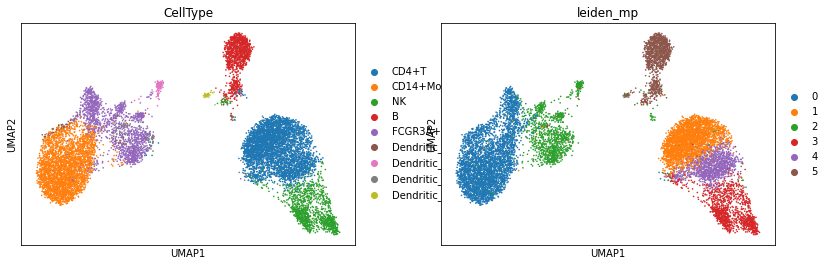

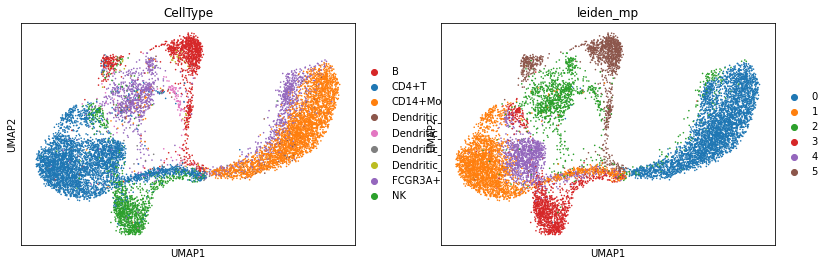

In [4]:
sc.pl.umap(rna, color=['CellType','leiden_mp'])#, legend_loc='on data')

sc.pl.umap(atac, color=['CellType','leiden_mp'])#, legend_loc='on data')

# Choose Embedding to test

In [5]:
preprocessing.get_embedding(rna, atac, embedding='pca',n_components=5)

In [6]:
rna.obsm['X_pcaPROVA'].shape, atac.obsm['X_pcaPROVA'].shape

((11589, 5), (11589, 5))

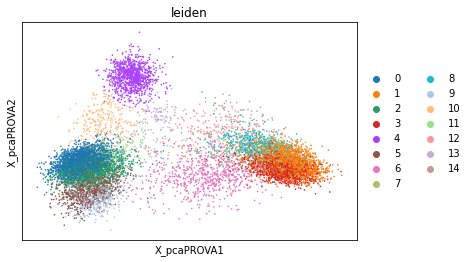

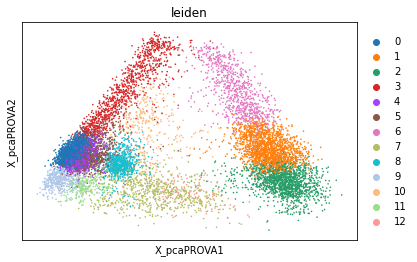

In [7]:
sc.pl.embedding(rna, basis='X_pcaPROVA', color=['leiden'])
sc.pl.embedding(atac, basis='X_pcaPROVA', color=['leiden'])

### train --> questa richiamare train_test, che richiama transition

In [8]:
train.train(rna,atac,n_epochs=3,method='hierarchical',embedding='pca')

2021-12-27 16:25:45.660020: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-27 16:25:45.660692: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


  0%|                                                                                                                                                              | 0/58 [00:00<?, ?it/s]2021-12-27 16:25:53.584148: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-27 16:25:53.592885: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-27 16:25:53.593889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
 11%|████████████████▊                                                                                                                                      | 1/9 [00:00<00:02,  3.83it/s]


Epoch: 0 | disc_loss1: 1.7729343175888062 | gen_loss: -0.285403847694397 


 11%|████████████████▊                                                                                                                                      | 1/9 [00:00<00:01,  7.29it/s]


Epoch: 1 | disc_loss1: -1.7890548706054688 | gen_loss: -0.8532129526138306 


 11%|████████████████▊                                                                                                                                      | 1/9 [00:00<00:00, 12.79it/s]


Epoch: 2 | disc_loss1: -3.7944350242614746 | gen_loss: -1.6718831062316895 
